In [1]:
import pandas as pd
df = pd.read_csv('d:/data/project/project_income.csv')

print(df.head())

   wave  region  family_member  year_born  education_level  marriage  \
0     1       1              1       1936                2         2   
1     7       1              1       1936                2         2   
2     8       1              1       1936                2         2   
3     9       1              1       1936                2         2   
4    10       1              1       1936                2         2   

   religion  company_size  reason_none_worker  gender  label  income  
0         2           NaN                 8.0       1      0   614.0  
1         2           NaN                10.0       1      0   896.0  
2         2           NaN                10.0       1      0  1310.0  
3         2           NaN                 1.0       1      0  2208.0  
4         2           NaN                10.0       1      0   864.0  


In [2]:
df = df.fillna(0)

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0:평균이하, 1:평균이상)')

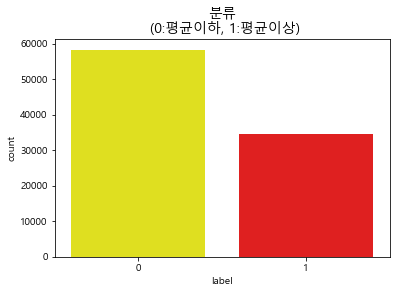

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
colors = ["yellow", "red"]
sns.countplot('label', data=df, palette=colors)
plt.title('분류\n (0:평균이하, 1:평균이상)', fontsize=14)

In [4]:
df = df.drop(columns=['religion'], axis=1)

In [5]:
train_cols = df.columns[:-2]
X = df[train_cols]
y=df['label']


In [6]:
# import mglearn
# pd.plotting.scatter_matrix(df, c=y, figsize=(15, 15),marker='o', cmap=mglearn.cm3)

In [7]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample,columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['label'])
df_samp = pd.concat([X_samp,y_samp],axis=1)

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0:평균이하, 1:평균이상)')

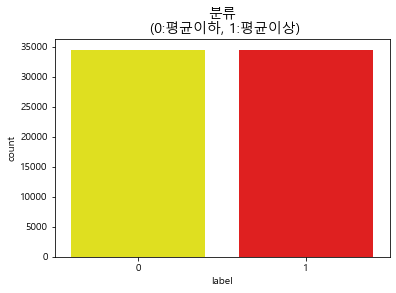

In [8]:
colors = ["yellow", "red"]
sns.countplot('label', data=df_samp, palette=colors)
plt.title('분류\n (0:평균이하, 1:평균이상)', fontsize=14)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y,random_state=10)

In [10]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_shape = (len(X_train.columns),),activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'mse', optimizer='adam', metrics=['accuracy'])

<AxesSubplot:>

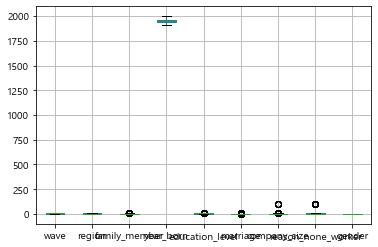

In [11]:
pd.DataFrame(X_train).boxplot()

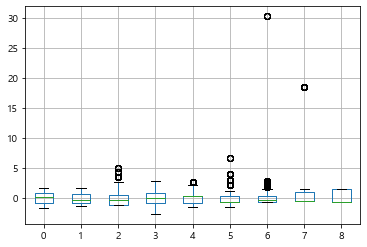

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

pd.DataFrame(X_train_scaled).boxplot()

X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [13]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=3)
hist = model.fit(X_train_scaled, y_train, epochs=50, batch_size=250,validation_split=0.2, callbacks=[early_stopping],verbose=1)

Epoch 1/50
238/238 [==============================] - 4s 7ms/step - loss: 0.1496 - accuracy: 0.7798 - val_loss: 0.1157 - val_accuracy: 0.8320
Epoch 2/50
238/238 [==============================] - 1s 6ms/step - loss: 0.1138 - accuracy: 0.8359 - val_loss: 0.1113 - val_accuracy: 0.8397
Epoch 3/50
238/238 [==============================] - 1s 6ms/step - loss: 0.1110 - accuracy: 0.8403 - val_loss: 0.1094 - val_accuracy: 0.8430
Epoch 4/50
238/238 [==============================] - 2s 6ms/step - loss: 0.1094 - accuracy: 0.8430 - val_loss: 0.1080 - val_accuracy: 0.8457
Epoch 5/50
238/238 [==============================] - 1s 6ms/step - loss: 0.1082 - accuracy: 0.8445 - val_loss: 0.1071 - val_accuracy: 0.8480
Epoch 6/50
238/238 [==============================] - 1s 6ms/step - loss: 0.1075 - accuracy: 0.8465 - val_loss: 0.1067 - val_accuracy: 0.8480
Epoch 7/50
238/238 [==============================] - 1s 6ms/step - loss: 0.1070 - accuracy: 0.8473 - val_loss: 0.1062 - val_accuracy: 0.8486
Epoch 

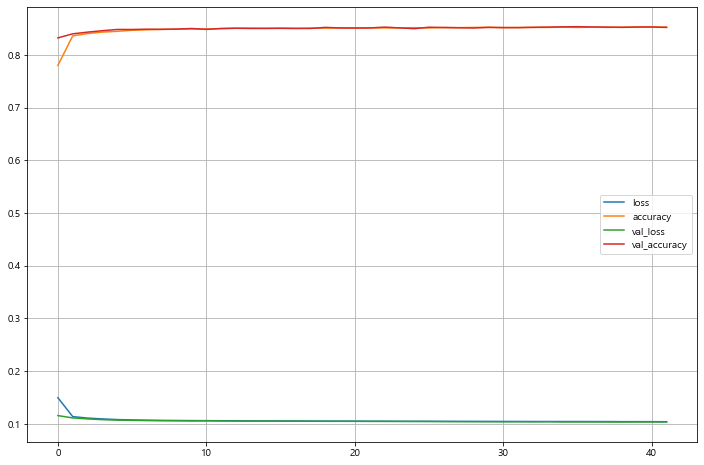

In [14]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','accuracy','val_loss','val_accuracy'])
plt.grid()
plt.show()

In [15]:
scores = model.evaluate(X_train_scaled, y_train, verbose=0)
print('train:'+str(scores)) 
print(f'{model.metrics_names[1]}: {scores[1]*100}')
scores = model.evaluate(X_test_scaled, y_test, verbose=0)
print('test'+str(scores))
print(f'{model.metrics_names[1]}: {scores[1]*100}')
pred=model.predict(X_test_scaled)
print(pred[:5])
import numpy as np
pred=model.predict(X_test_scaled)
print(np.round(pred[:5]))

train:[0.10404179990291595, 0.8528370261192322]
accuracy: 85.28370261192322
test[0.10297839343547821, 0.853004515171051]
accuracy: 85.3004515171051
581/581 [==============================] - 1s 2ms/step
[[0.7901501 ]
 [0.3243561 ]
 [0.00727703]
 [0.2936428 ]
 [0.8617511 ]]
581/581 [==============================] - 1s 2ms/step
[[1.]
 [0.]
 [0.]
 [0.]
 [1.]]
